In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/techin/bank-app-review-analysis_week2/data/cleaned_reviews_sentiment.csv')
df.head()

,Unnamed: 0,review,rating,date,bank,source,sentiment_textblob_score,sentiment_textblob_label,compound_score,sentiments_vader,label,predicted_sentiment
0,0,niec,5,2025-06-04,CBE,Google Play,0.0,neutral,0.0000,neutral,positive,positive
1,1,best app finance,5,2025-06-04,CBE,Google Play,1.0,positive,0.6369,posetive,positive,positive
2,2,yetemeta,1,2025-06-03,CBE,Google Play,0.0,neutral,0.0000,neutral,negative,negative
3,3,engida kebede fetera,5,2025-06-03,CBE,Google Play,0.0,neutral,0.0000,neutral,positive,positive
4,4,good,5,2025-06-03,CBE,Google Play,0.7,positive,0.4404,posetive,positive,positive


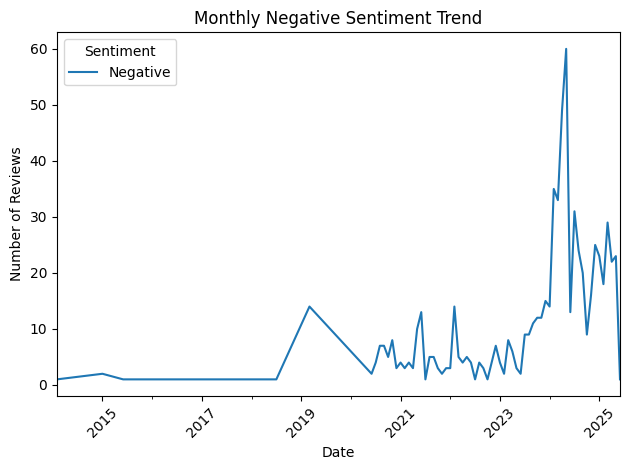

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' has 'date' and 'sentiment_textblob_label' columns
df['date'] = pd.to_datetime(df['date'])

negative_trend = (
    df[df['sentiment_textblob_label'] == 'negative']
    .groupby(df['date'].dt.to_period("M"))
    .size()
)

negative_trend.plot(kind='line', label='Negative', title='Monthly Negative Sentiment Trend')
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

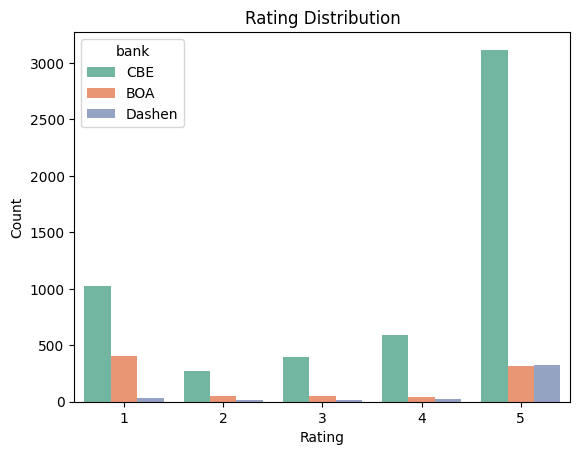

In [4]:
sns.countplot(data=df, x='rating', hue='bank', palette='Set2')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

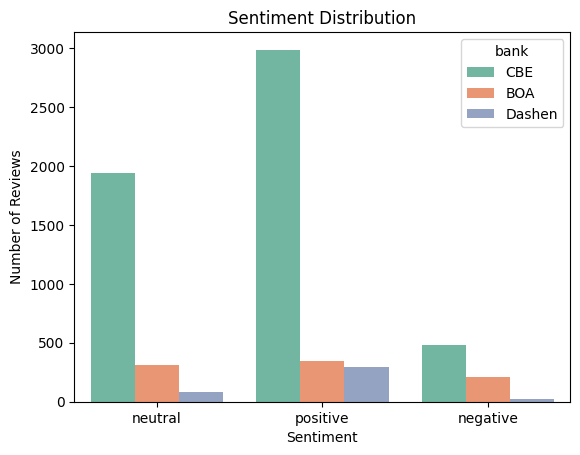

In [5]:
sns.countplot(data=df, x='sentiment_textblob_label', hue='bank', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

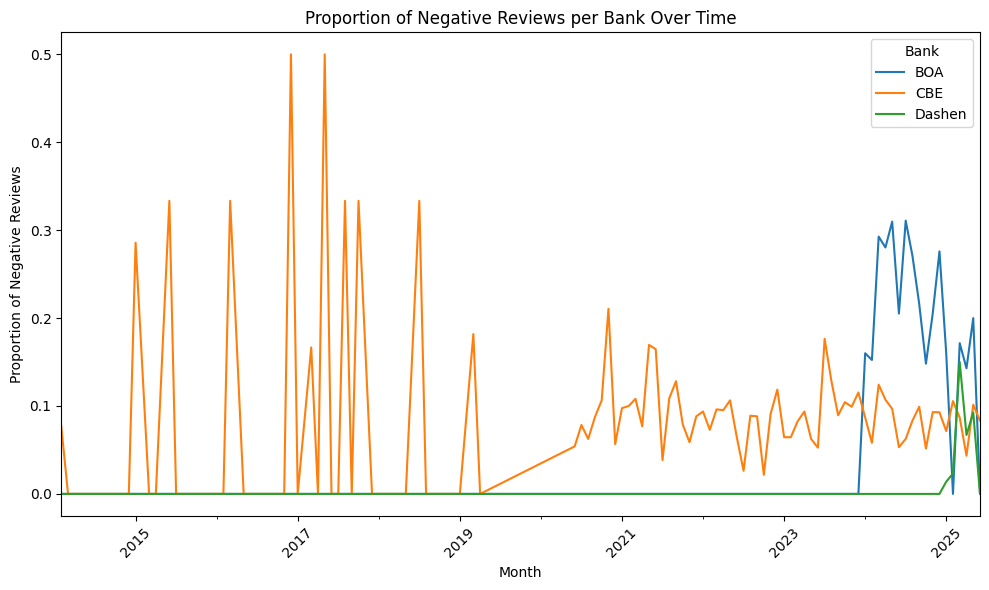

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'])

# Create a 'month' column
df['month'] = df['date'].dt.to_period('M')

# Step 1: Count total reviews per bank per month
total_reviews = df.groupby(['month', 'bank']).size()

# Step 2: Count negative reviews per bank per month
negative_reviews = df[df['sentiment_textblob_label'] == 'negative'].groupby(['month', 'bank']).size()

# Step 3: Calculate proportion of negative reviews
negative_proportion = (negative_reviews / total_reviews).unstack().fillna(0)

# Step 4: Plot
negative_proportion.plot(kind='line', figsize=(10, 6))
plt.title('Proportion of Negative Reviews per Bank Over Time')
plt.xlabel('Month')
plt.ylabel('Proportion of Negative Reviews')
plt.xticks(rotation=45)
plt.legend(title='Bank')
plt.tight_layout()
plt.show()

In [7]:
df_raw = pd.read_csv('C:/Users/techin/bank-app-review-analysis_week2/data/raw_reviews.csv')
df_raw.head()

,review,rating,date,bank,source
0,👌👍,5,2025-06-04,CBE,Google Play
1,very niec,5,2025-06-04,CBE,Google Play
2,best app of finance,5,2025-06-04,CBE,Google Play
3,yetemeta,1,2025-06-03,CBE,Google Play
4,Engida Kebede Fetera,5,2025-06-03,CBE,Google Play


In [8]:
df_raw.shape

(8979, 5)

In [9]:
df_raw['bank'].value_counts()

bank
CBE       7486
BOA       1044
Dashen     449
Name: count, dtype: int64

In [10]:
df_raw.isna().sum()

review    7
rating    0
date      0
bank      0
source    0
dtype: int64

In [11]:
df.shape

(6679, 13)

In [13]:
df['bank'].value_counts()

bank
CBE       5405
BOA        868
Dashen     406
Name: count, dtype: int64

In [14]:
import pandas as pd

# Calculate average rating by bank
average_ratings = df.groupby('bank')['rating'].mean().reset_index()

# Optional: Sort by rating descending
average_ratings = average_ratings.sort_values(by='rating', ascending=False)

print(average_ratings)

     bank    rating
2  Dashen  4.428571
1     CBE  3.831452
0     BOA  2.789171
